General Code for All Questions

In [154]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# INVOICES
invoices_df = pd.read_csv('fct_invoice.csv')

# CUSTOMERS
with open('dim_customer.json','r') as customers:
    data = json.load(customers)

Easy 1: How many unique customers are in the dataset?

There are 5,191 unique customers in the dataset.

In [155]:
print(invoices_df['customer_id'].nunique())

5191


Easy 2: What are the different categories of products available? How many unique categories are there?

The different categories of products available are Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, and Souvenir. There are 8 unique categories.

In [156]:
# What are the categories? 
print(invoices_df['category'].unique())

# How many unique categories?
print(invoices_df['category'].nunique())

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


Easy 3: Which payment method is the most popular? How many times was it used?

Among the payment methods (Credit Card, Debit Card, Cash), Cash was the most popular, which was used 44,447 times.

In [157]:
# Getting the payment methods
print(invoices_df['payment_method'].unique())

print(invoices_df['payment_method'].value_counts())
# Whichever was the largest here

['Credit Card' 'Debit Card' 'Cash']
Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64


Medium 1: What are the three most popular categories, by total sales?

By total sales, the three most popular categories are Clothing, Shoes, and Technology.

In [158]:
invoices_df["Sales"] = invoices_df["quantity"] * invoices_df["price"]

invoices_df.groupby('category')['Sales'].sum().sort_values()

category
Souvenir           6.358247e+05
Books              8.345529e+05
Food & Beverage    8.495351e+05
Toys               3.980426e+06
Cosmetics          6.792863e+06
Technology         5.786235e+07
Shoes              6.655345e+07
Clothing           1.139968e+08
Name: Sales, dtype: float64

Medium 2: What are the total sales attributed to customers over the age of 45?

The total sales attributed to customers over the age of 45 is 82,039,768.15.

In [159]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# INVOICES
invoices_df = pd.read_csv('fct_invoice.csv')

invoices_df["Sales"] = invoices_df["quantity"] * invoices_df["price"]

# CUSTOMERS
with open('dim_customer.json','r') as customers:
    data = json.load(customers)
    
data_df = pd.DataFrame(data)
invoices_df = pd.merge(invoices_df, data_df, left_on='customer_id', right_on='id')
invoices_df.loc[invoices_df['age'] > 45, 'Sales'].sum()

82039768.15

Medium 3: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

From January to March, the sales are at some of their highest, with January being the month when sales are at their largest, while they are around the same from April to December. Across the months and years, Clothing, Shoes, and Technology are consistently the best-selling categories.

/var/folders/sr/8txjt_gx16d53plygxqlqr9w0000gn/T/ipykernel_20882/164761798.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  invoices_df["Month of Invoice"] = pd.DatetimeIndex(invoices_df['invoice_date']).month
/var/folders/sr/8txjt_gx16d53plygxqlqr9w0000gn/T/ipykernel_20882/164761798.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  invoices_df["Year of Invoice"] = pd.DatetimeIndex(invoices_df['invoice_date']).year


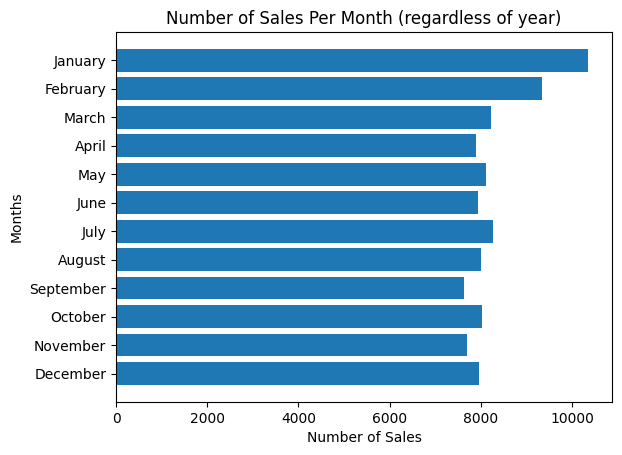

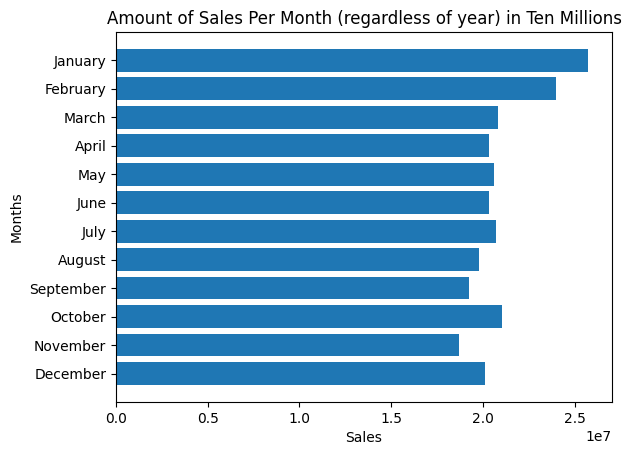

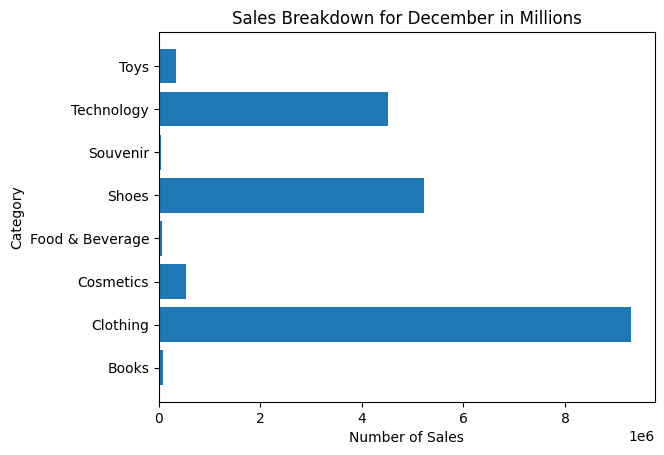

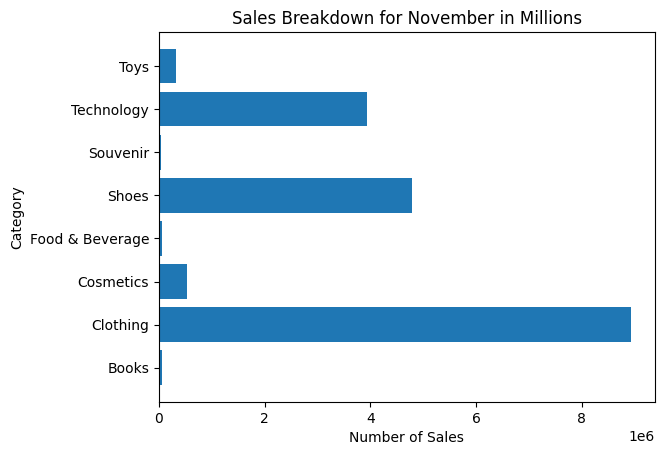

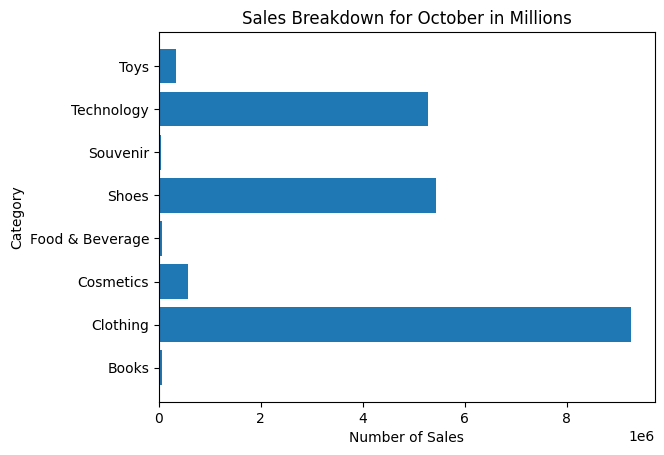

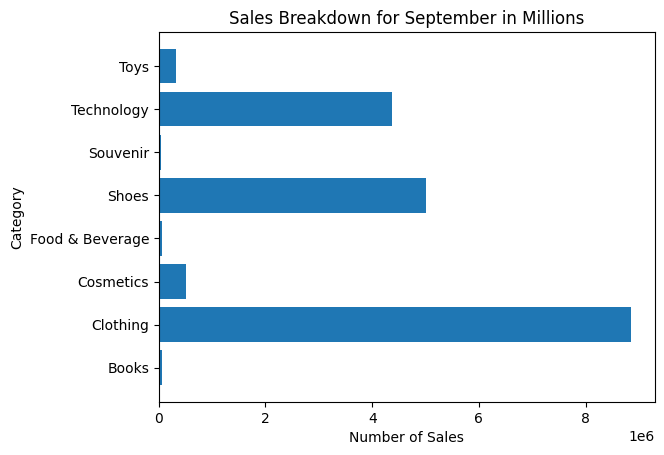

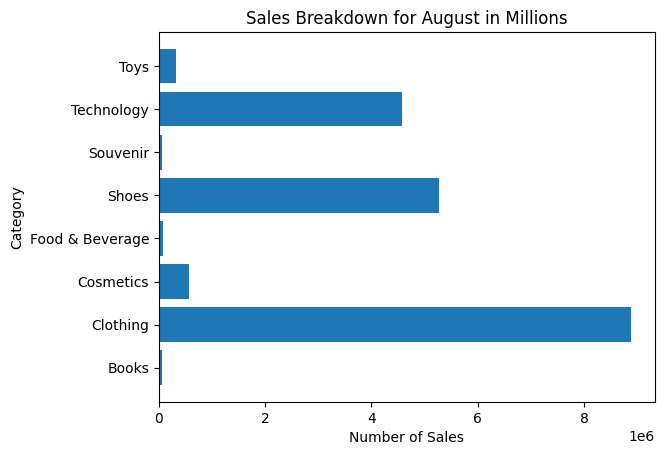

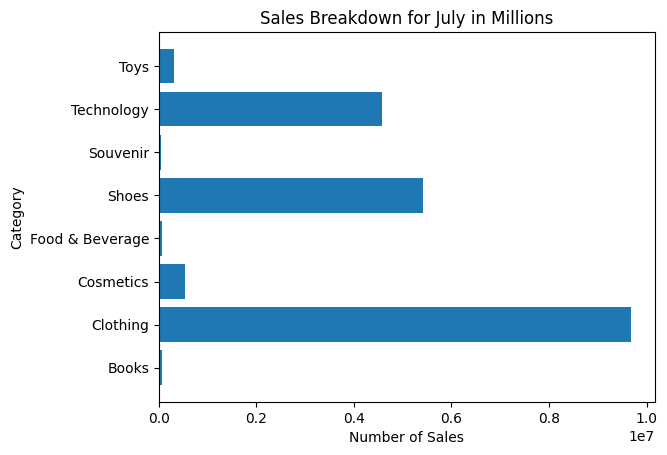

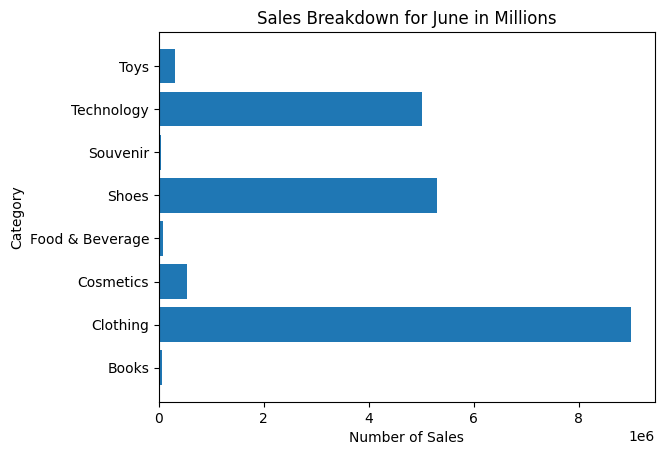

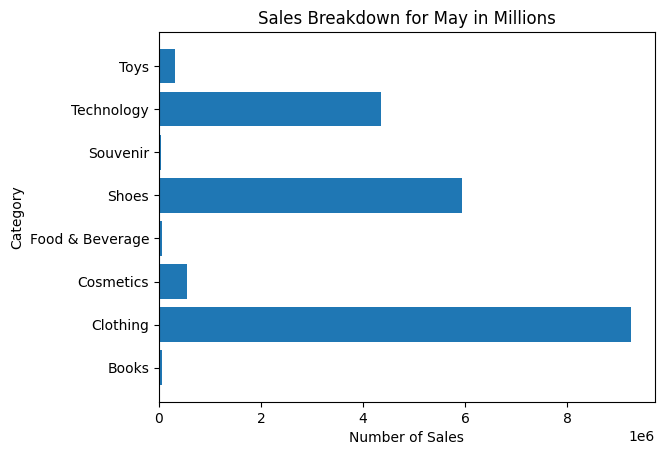

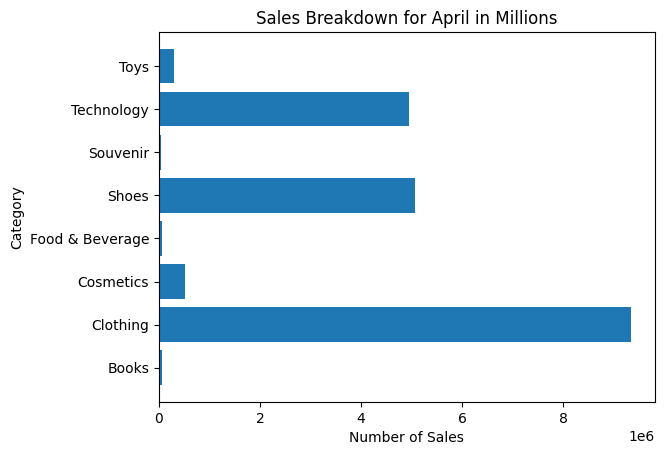

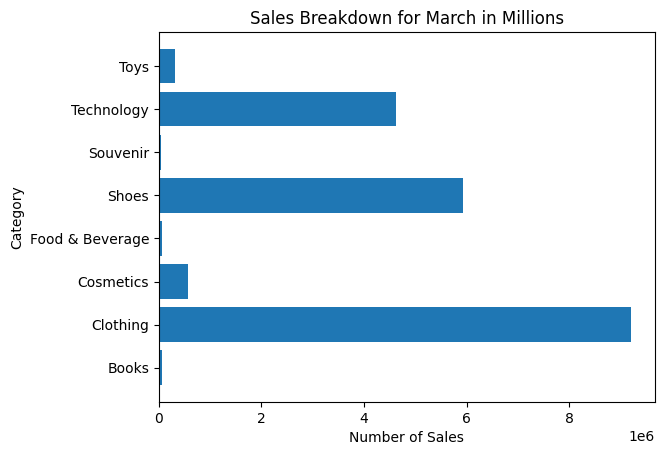

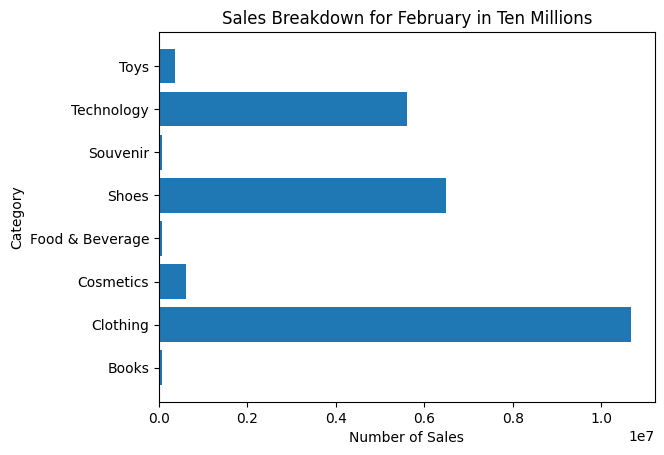

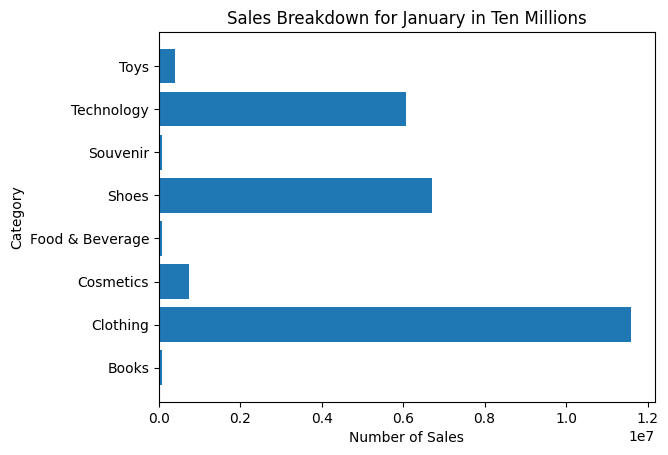

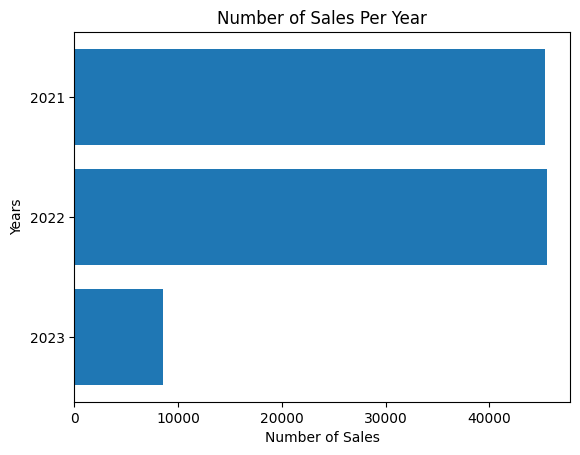

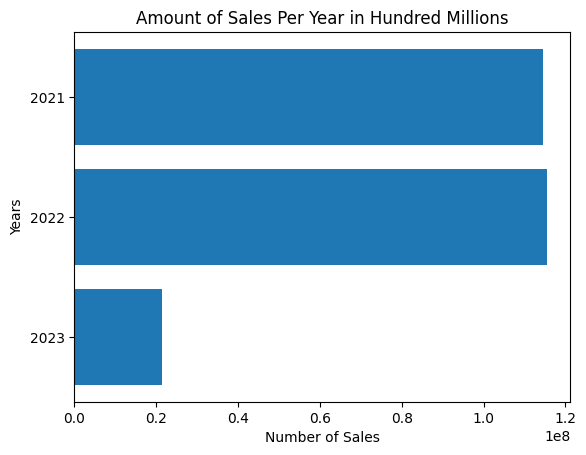

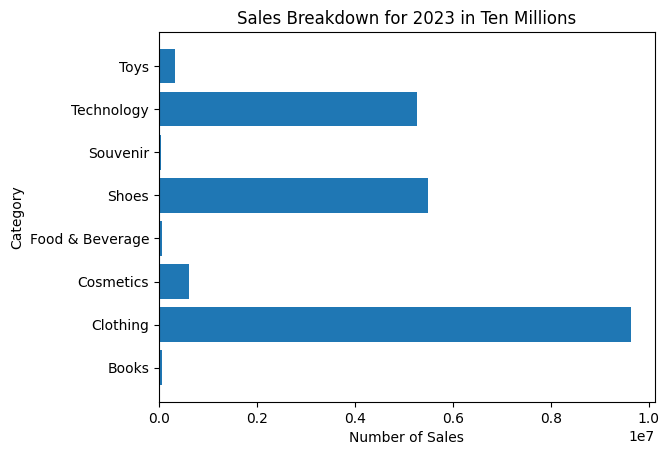

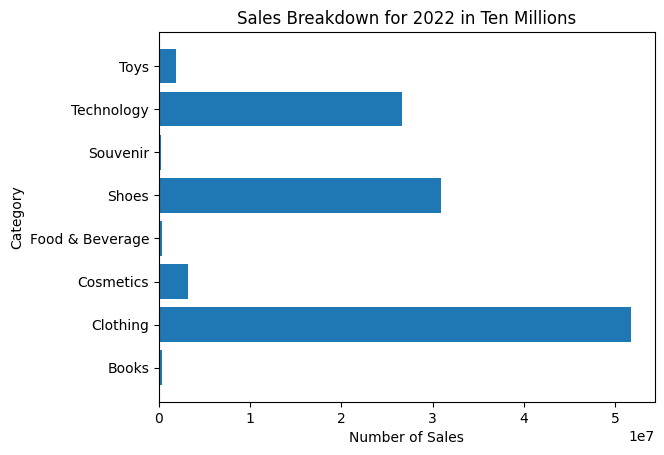

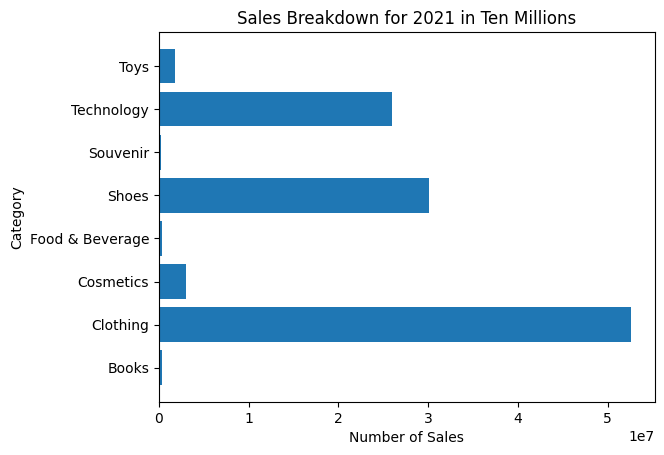

In [161]:
invoices_df["Sales"] = invoices_df["quantity"] * invoices_df["price"]

invoices_df["Month of Invoice"] = pd.DatetimeIndex(invoices_df['invoice_date']).month
invoices_df["Year of Invoice"] = pd.DatetimeIndex(invoices_df['invoice_date']).year
invoices_df.groupby('Month of Invoice')['category']

january = invoices_df['Month of Invoice'].value_counts()[1]
february = invoices_df['Month of Invoice'].value_counts()[2]
march = invoices_df['Month of Invoice'].value_counts()[3]
april = invoices_df['Month of Invoice'].value_counts()[4]
may = invoices_df['Month of Invoice'].value_counts()[5]
june = invoices_df['Month of Invoice'].value_counts()[6]
july = invoices_df['Month of Invoice'].value_counts()[7]
august = invoices_df['Month of Invoice'].value_counts()[8]
september = invoices_df['Month of Invoice'].value_counts()[9]
october = invoices_df['Month of Invoice'].value_counts()[10]
november = invoices_df['Month of Invoice'].value_counts()[11]
december = invoices_df['Month of Invoice'].value_counts()[12]
invoices_df['Month of Invoice'] = np.where((invoices_df['Month of Invoice'] == 1), 'January', np.where((invoices_df['Month of Invoice'] == 2), 'February', np.where((invoices_df['Month of Invoice'] == 3), 'March', np.where((invoices_df['Month of Invoice'] == 4), 'April', np.where((invoices_df['Month of Invoice'] == 5), 'May', np.where((invoices_df['Month of Invoice'] == 6), 'June', np.where((invoices_df['Month of Invoice'] == 7), 'July',np.where((invoices_df['Month of Invoice'] == 8), 'August', np.where((invoices_df['Month of Invoice'] == 9), "September",np.where((invoices_df['Month of Invoice'] == 10), "October",np.where((invoices_df['Month of Invoice'] == 11), "November","December")))))))))))

pivot_table_month = invoices_df.pivot_table(index='category',columns='Month of Invoice', values='Sales', aggfunc='sum')

#Number of Sales Per Month (regardless of year)
months = ["December","November","October","September","August","July","June","May","April","March","February","January"]
values = [december,november,october,september,august,july,june,may,april,march,february,january]
plt.barh(months, values)
plt.title("Number of Sales Per Month (regardless of year)")
plt.xlabel("Number of Sales")
plt.ylabel('Months')
plt.show()

#Amount of Sales Per Month (regardless of year)
months = ["December","November","October","September","August","July","June","May","April","March","February","January"]
monthly_sales = [pivot_table_month[item].sum() for item in months]
plt.barh(months, monthly_sales)
plt.title("Amount of Sales Per Month (regardless of year) in Ten Millions")
plt.xlabel("Sales")
plt.ylabel('Months')
plt.show()

#Monthly Breakdown of sales per category (regardless of year)
for item in months:
    if item == "February":
        categories = ["Books","Clothing","Cosmetics","Food & Beverage","Shoes","Souvenir","Technology","Toys"]
        sales_per_category = list(pivot_table_month[item])
        plt.barh(categories, sales_per_category)
        plt.title("Sales Breakdown for"+" "+item+" "+"in Ten Millions")
        plt.xlabel("Number of Sales")
        plt.ylabel('Category')
        plt.show()
    elif item == "January":
        categories = ["Books","Clothing","Cosmetics","Food & Beverage","Shoes","Souvenir","Technology","Toys"]
        sales_per_category = list(pivot_table_month[item])
        plt.barh(categories, sales_per_category)
        plt.title("Sales Breakdown for"+" "+item+" "+"in Ten Millions")
        plt.xlabel("Number of Sales")
        plt.ylabel('Category')
        plt.show()
    else:
        categories = ["Books","Clothing","Cosmetics","Food & Beverage","Shoes","Souvenir","Technology","Toys"]
        sales_per_category = list(pivot_table_month[item])
        plt.barh(categories, sales_per_category)
        plt.title("Sales Breakdown for"+" "+item+" "+"in Millions")
        plt.xlabel("Number of Sales")
        plt.ylabel('Category')
        plt.show()

twenty_three = invoices_df['Year of Invoice'].value_counts()[2023]
twenty_two = invoices_df['Year of Invoice'].value_counts()[2022]
twenty_one = invoices_df['Year of Invoice'].value_counts()[2021]
#Using print(set(years)) allowed me to see what the unique years are

pivot_table_year = invoices_df.pivot_table(index='category',columns='Year of Invoice', values='Sales', aggfunc='sum')

#Number of Sales Per Year
years = ["2023","2022","2021"]
values = [twenty_three,twenty_two,twenty_one]
plt.barh(years, values)
plt.title("Number of Sales Per Year")
plt.xlabel("Number of Sales")
plt.ylabel('Years')
plt.show()

#Amount of Sales Per Year
years = ["2023","2022","2021"]
yearly_sales = [pivot_table_year[int(item)].sum() for item in years]
plt.barh(years, yearly_sales)
plt.title("Amount of Sales Per Year in Hundred Millions")
plt.xlabel("Number of Sales")
plt.ylabel('Years')
plt.show()

#Yearly Breakdown of sales per category
for item in years:
    categories = ["Books","Clothing","Cosmetics","Food & Beverage","Shoes","Souvenir","Technology","Toys"]
    sales_per_year = list(pivot_table_year[int(item)])
    plt.barh(categories, sales_per_year)
    plt.title("Sales Breakdown for"+" "+item+" "+"in Ten Millions")
    plt.xlabel("Number of Sales")
    plt.ylabel('Category')
    plt.show()

Hard 1: Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [162]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# INVOICES
invoices_df = pd.read_csv('fct_invoice.csv')

invoices_df["Sales"] = invoices_df["quantity"] * invoices_df["price"]

# CUSTOMERS
with open('dim_customer.json','r') as customers:
    data = json.load(customers)

data_df = pd.DataFrame(data)
invoices_df = pd.merge(invoices_df, data_df, left_on='customer_id', right_on='id')

invoices_df['Age Range'] = np.where((invoices_df['age'] >= 10) & (invoices_df['age'] <= 19), '10-19', np.where((invoices_df['age'] >= 20) & (invoices_df['age'] <= 29), '20-29', np.where((invoices_df['age'] >= 30) & (invoices_df['age'] <= 39), '30-39', np.where((invoices_df['age'] >= 40) & (invoices_df['age'] <= 49), '40-49', np.where((invoices_df['age'] >= 50) & (invoices_df['age'] <= 59), '50-59', np.where((invoices_df['age'] >= 60) & (invoices_df['age'] <= 69), '60-69', np.where((invoices_df['age'] >= 70) & (invoices_df['age'] <= 79), '70-79', np.where((invoices_df['age'] >= 80) & (invoices_df['age'] <= 89), '80-89',"None"))))))))

pivot_table = invoices_df.pivot_table(index='category',columns='Age Range', values='Sales', aggfunc='sum')
display(pivot_table)

Age Range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,None
category,,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00,334012.05
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00,46003764.40
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60,2777362.62
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93,345875.59
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60,26468097.17
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06,265661.04
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00,23865450.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80,1587210.24
